### Reading the data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking for Null value

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 1. Compare churn count with respect to gender

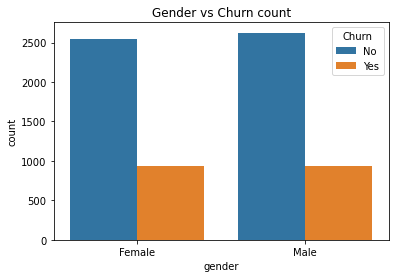

In [4]:
sns.countplot(x='gender', hue='Churn',data=data)
plt.title("Gender vs Churn count")
plt.show()

### 2. Find out how many female senior citizens there in the dataset

In [32]:
df1=data.groupby('gender').SeniorCitizen.value_counts()
df1

gender  SeniorCitizen
Female  0                2920
        1                 568
Male    0                2981
        1                 574
Name: SeniorCitizen, dtype: int64

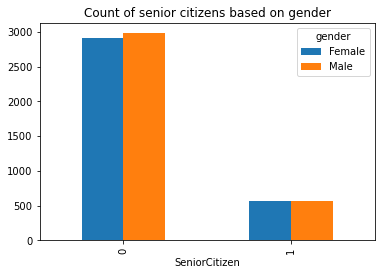

In [31]:
df=data.groupby('gender').SeniorCitizen.value_counts().unstack(0).plot.bar()
plt.title("Count of senior citizens based on gender")
plt.show()


### 3. Compare 'tenure' with 'Total Charges'


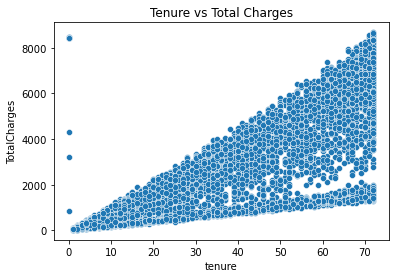

In [26]:
sns.scatterplot(x="tenure", y="TotalCharges",data=data)
plt.title("Tenure vs Total Charges")
plt.show()

### 4. Find out which contract is preferred by the senior citizen.

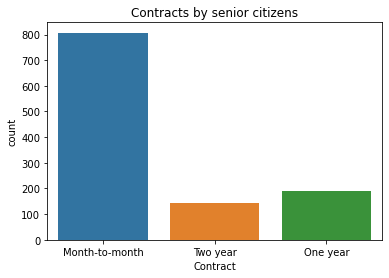

In [34]:
data1=data[data['SeniorCitizen']==1.0]
sns.countplot(x='Contract',data=data1)
plt.title("Contracts by senior citizens")
plt.show()

### 5. Comment on your finds on Payment Method?

In [36]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

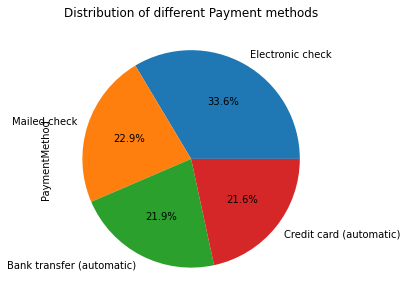

In [53]:
methods=data['PaymentMethod'].value_counts()
plt.figure(figsize=(5,5))
ax=methods.plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of different Payment methods")
plt.show()



An electronic check is the most used payment method